 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_data = Path("Resources/whale_returns.csv") #Setting the path for the csv file
whale_returns_df = pd.read_csv(whale_returns_data, index_col = "Date", infer_datetime_format=True, parse_dates=True) 
whale_returns_df.sort_index(inplace=True)
whale_returns_df
# I read the csv file with read_csv, changed the index to date, formatted the date, and then sorted the index inasceding order(default)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [3]:
# Count nulls
whale_returns_df.isnull().sum()
#Using 'isnull', I uncovered the nulls, and used 'sum' to count the amount of nulls in each column

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_data = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_data, index_col = "Date", infer_datetime_format = True, parse_dates = True)
algo_returns_df.sort_index(inplace = True)
algo_returns_df.head()
# Using the same code used to read and set the whale returns data, I set up the algorithmic returns

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_data = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_data, index_col = "Date", infer_datetime_format= True, parse_dates= True)
sp500_history_df.sort_index(inplace= True)
sp500_history_df.head()


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df['Close'].dtype
# I removed "$" and replaced with nothing, then turned the data type into a float in order to use the data in a calculation

C:\Users\ayana\anaconda3\envs\dev\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('float64')

In [11]:
# Calculate Daily Returns
sp500_returns = sp500_history_df.pct_change()
sp500_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [12]:
# Drop nulls
sp500_returns = sp500_returns.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_returns = sp500_returns.rename(columns= {"Close": "SP500_Close"})
sp500_returns


,SP500_Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns_df, algo_returns_df, sp500_returns], axis="columns", join="inner")
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

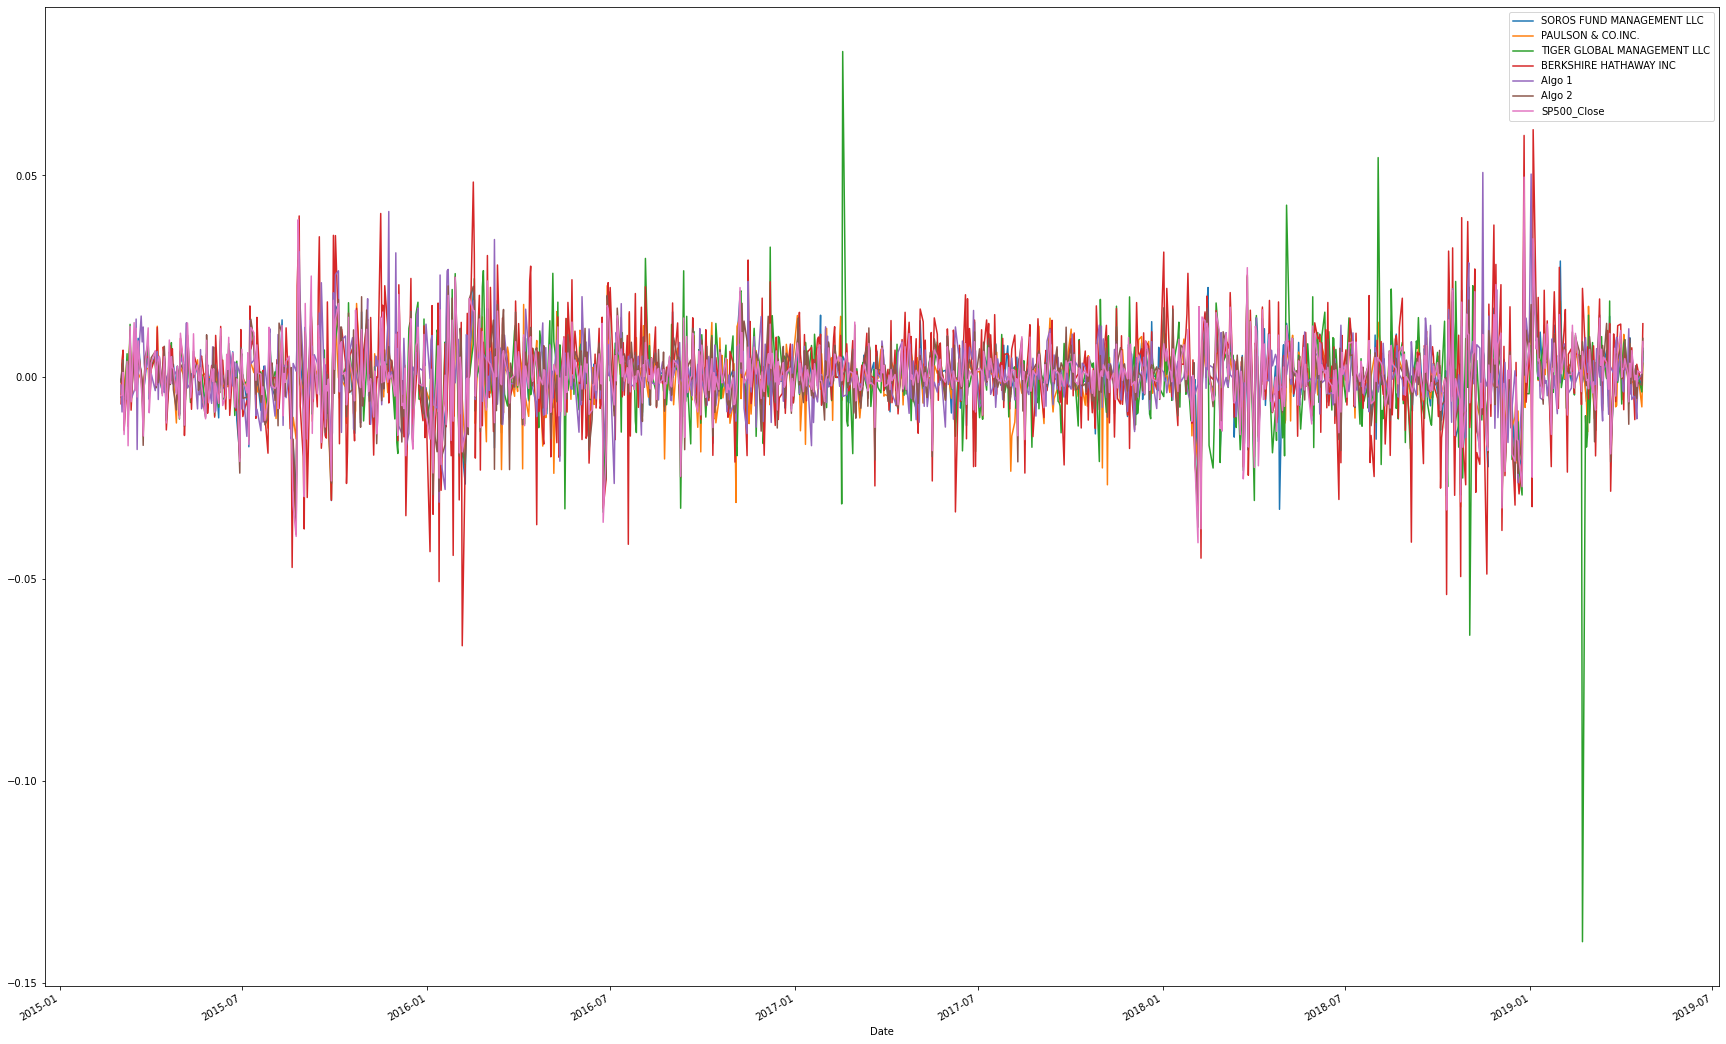

In [15]:
# Plot daily returns of all portfolios
combined_returns.plot(figsize= (30,20))


#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

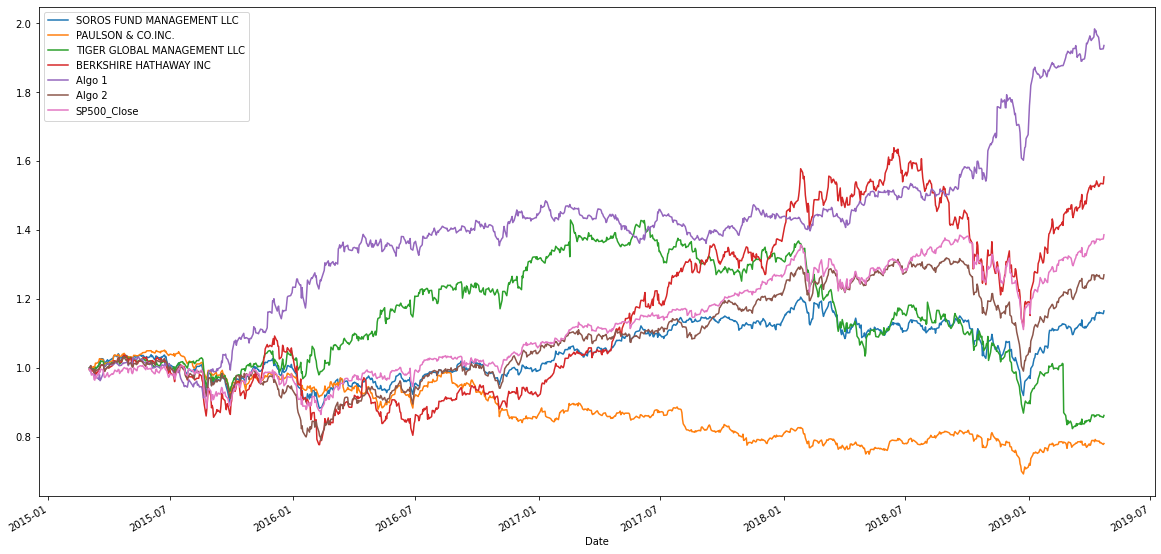

In [16]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ combined_returns).cumprod()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

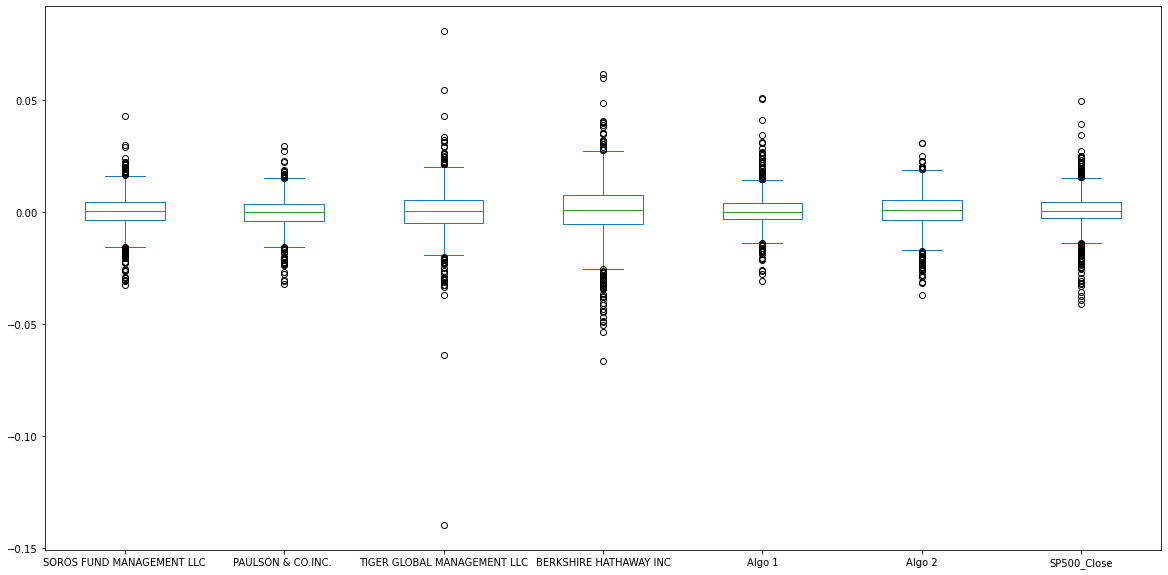

In [17]:
# Box plot to visually show risk
combined_returns.plot.box(figsize= (20,10))

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std = daily_std.sort_values(ascending= False)
daily_std.head(6)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500_Close                    0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [19]:
# Calculate  the daily standard deviation of S&P 500
daily_stdev_sp500 = combined_returns["SP500_Close"].std()
# Determine which portfolios are riskier than the S&P 500
daily_std > daily_stdev_sp500
# According to these results, Berkshire Hathaway Inc, and Tiger Global Management Inc are riskier than the S&P 500

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
SP500_Close                    False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_dev = daily_std * np.sqrt(252)
annualized_std_dev

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500_Close                    0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

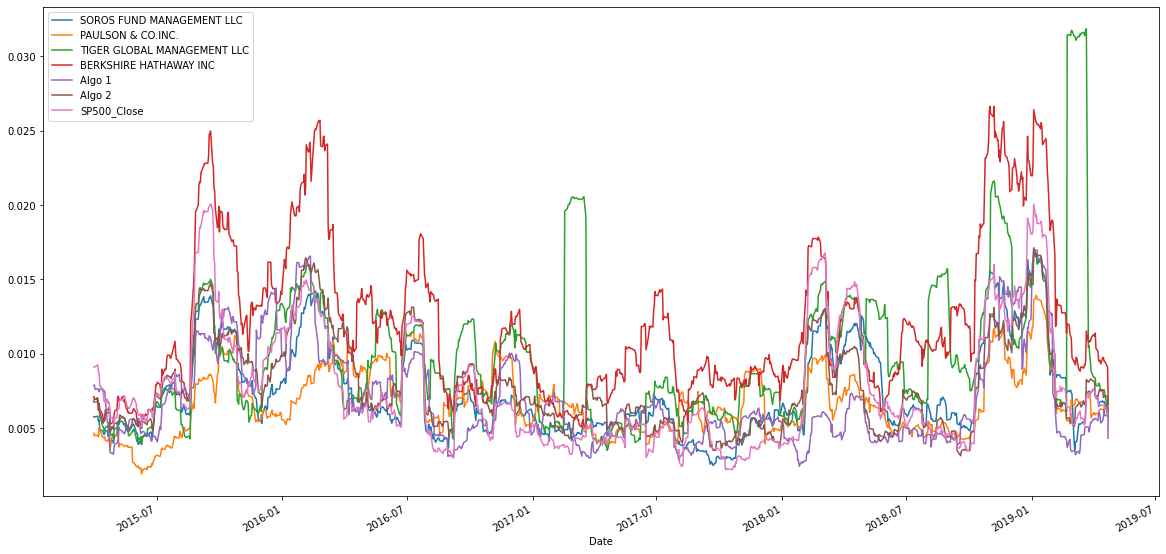

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_portfolios_sma = combined_returns.rolling(window= 21).std()

# Plot the rolling standard deviation
combined_portfolios_sma.plot(figsize= (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

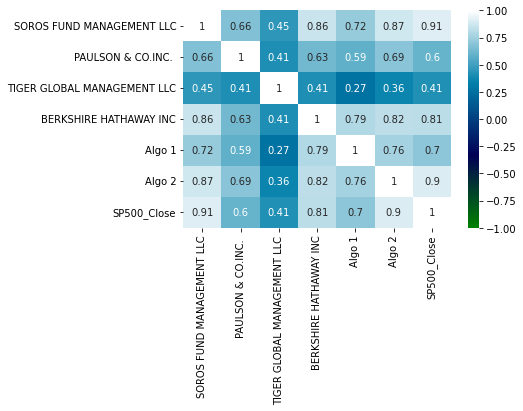

In [22]:
# Calculate the correlation
portfolio_correlation = combined_portfolios_sma.corr()
# Display de correlation matrix
sns.heatmap(portfolio_correlation, annot= True, vmin=-1, vmax=1, cmap='ocean')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

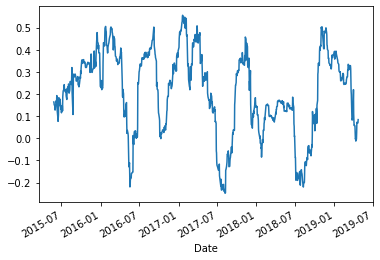

In [23]:
# Calculate covariance of a single portfolio
covariance_algo1 = combined_returns['Algo 1'].rolling(window = 60).cov(combined_returns['SP500_Close'])

# Calculate variance of S&P 500
sp500_var = sp500_returns['SP500_Close'].rolling(60).var()

# Computing beta
beta_portfolios = covariance_algo1 / sp500_var

# Plot beta trend
beta_portfolios.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

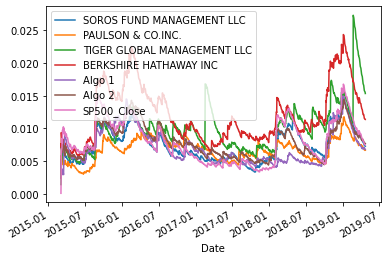

In [24]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife = 21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [25]:
# Annualized Sharpe Ratios
sharpe_ratio_all = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratio_all

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500_Close                    0.648267
dtype: float64

<AxesSubplot:>

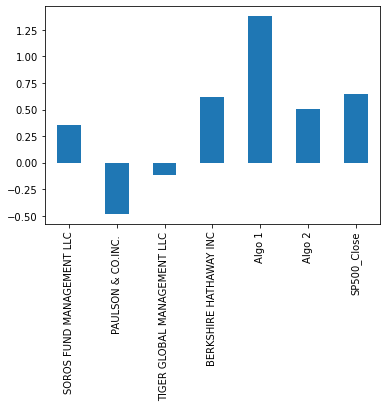

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_all.plot(kind = "bar")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Algo 1 is the only algorithmic strategy that outperforms the market and the whales. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
appl_data = pd.read_csv("Resources/AAPL_year.csv", parse_dates=True, infer_datetime_format=True, index_col= "Date")
appl_data

,AAPL
Date,
2016-03-04,25.75
2016-03-07,25.47
2016-03-08,25.26
2016-03-09,25.28
2016-03-10,25.29
...,...
2019-03-28,47.18
2019-03-29,47.49
2019-04-01,47.81


In [28]:
# Reading data from 2nd stock
et_data = pd.read_csv("Resources/ET_year.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")
et_data

,ET
Date,
2016-03-04,8.33
2016-03-07,8.26
2016-03-08,7.32
2016-03-09,7.50
2016-03-10,7.13
...,...
2019-03-28,15.22
2019-03-29,15.37
2019-04-01,15.60


In [29]:
# Reading data from 3rd stock
dvn_data = pd.read_csv("Resources/DVN_year.csv", parse_dates=True, infer_datetime_format=True, index_col="Date")
dvn_data

,DVN
Date,
2016-03-04,23.31
2016-03-07,24.19
2016-03-08,21.47
2016-03-09,22.93
2016-03-10,22.48
...,...
2019-03-28,31.88
2019-03-29,31.56
2019-04-01,31.54


In [30]:
# Combine all stocks in a single DataFrame
my_portfolio = pd.concat([appl_data, dvn_data, et_data], axis='columns', join='inner')
my_portfolio

,AAPL,DVN,ET
Date,,,
2016-03-04,25.75,23.31,8.33
2016-03-07,25.47,24.19,8.26
2016-03-08,25.26,21.47,7.32
2016-03-09,25.28,22.93,7.50
2016-03-10,25.29,22.48,7.13
...,...,...,...
2019-03-28,47.18,31.88,15.22
2019-03-29,47.49,31.56,15.37
2019-04-01,47.81,31.54,15.60


In [31]:
# Reset Date index
#my_portfolio = my_portfolio.reset_index()
#my_portfolio

In [32]:
# Reorganize portfolio data by having a column per symbol


In [33]:
# Calculate daily returns
my_portfolio_daily_returns = my_portfolio.pct_change()
# Drop NAs
my_portfolio_daily_returns = my_portfolio_daily_returns.dropna()
# Display sample data
my_portfolio_daily_returns.sample(10)

,AAPL,DVN,ET
Date,,,
2016-10-21,-0.004100,-0.005822,0.000607
2018-08-17,0.020064,-0.001967,0.029885
2016-06-17,-0.022960,0.033908,0.002315
2017-08-25,0.003767,0.001285,0.005952
2019-02-06,0.000230,-0.002978,-0.007947
2017-12-27,0.000235,-0.017379,-0.002347
2017-11-27,-0.005030,-0.032606,-0.008010
2018-09-04,0.003163,-0.013510,0.014857
2017-02-10,-0.002115,0.014749,-0.016188


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns_weighted = my_portfolio_daily_returns.dot(weights)
portfolio_returns_weighted = pd.DataFrame(portfolio_returns_weighted, columns=["My Portfolio"])
# Display sample data
portfolio_returns_weighted

,My Portfolio
Date,
2016-03-07,0.006158
2016-03-08,-0.078163
2016-03-09,0.031128
2016-03-10,-0.022854
2016-03-11,0.023302
...,...
2019-03-28,0.006934
2019-03-29,0.002129
2019-04-01,0.007023


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_combined = pd.concat([portfolio_returns_weighted , combined_returns], axis='columns', join='inner')
all_portfolios_combined

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Close
Date,,,,,,,,
2016-03-07,0.006158,0.005661,0.008623,-0.006537,-0.013452,-0.003445,0.014166,0.000885
2016-03-08,-0.078163,-0.017508,-0.011011,-0.006303,-0.004351,0.034130,-0.022802,-0.011240
2016-03-09,0.031128,0.005794,0.009729,0.004657,0.007993,0.001953,0.007020,0.005057
2016-03-10,-0.022854,-0.003895,-0.000311,-0.004457,-0.004564,0.006494,-0.008263,0.000151
2016-03-11,0.023302,0.019038,0.015285,0.010858,0.027820,-0.006676,0.018031,0.016396
...,...,...,...,...,...,...,...,...
2019-03-28,0.006934,0.003216,-0.006963,0.005932,0.005964,0.009932,0.005775,0.003590
2019-03-29,0.002129,0.001392,0.003030,-0.001277,0.012783,-0.000868,0.004576,0.006734
2019-04-01,0.007023,0.009000,0.010073,0.003972,0.013182,0.008159,0.007257,0.011569


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_combined.isnull().sum()

My Portfolio                   0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
SP500_Close                    0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
all_daily_std = all_portfolios_combined.std()
all_annualized_std = all_daily_std * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

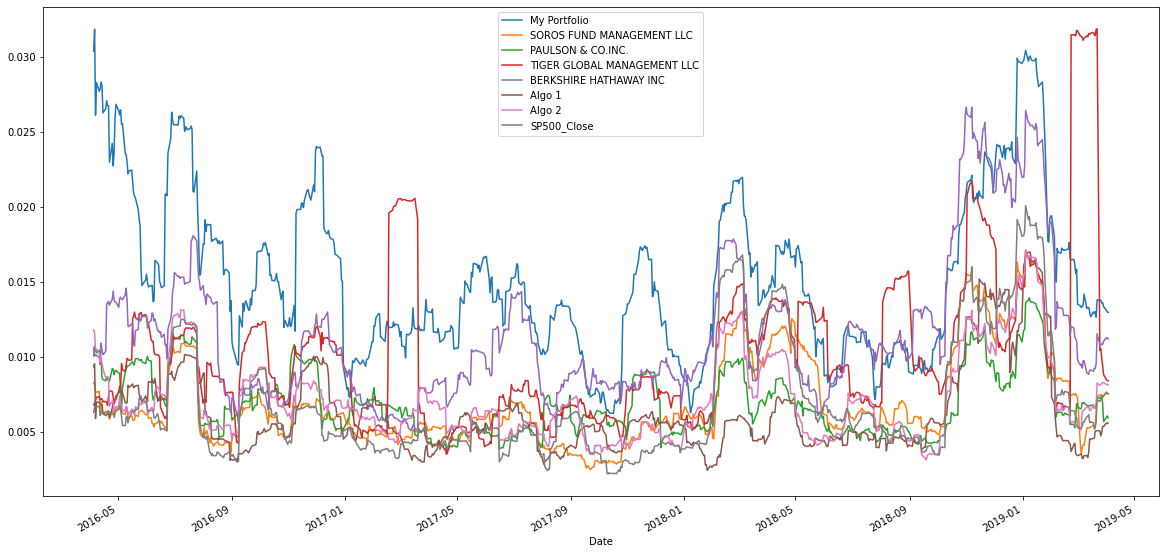

In [38]:
# Calculate rolling standard deviation
all_rolling_std = all_portfolios_combined.rolling(window=21).std()
# Plot rolling standard deviation
all_rolling_std.plot(figsize= (20,10))

### Calculate and plot the correlation

<AxesSubplot:>

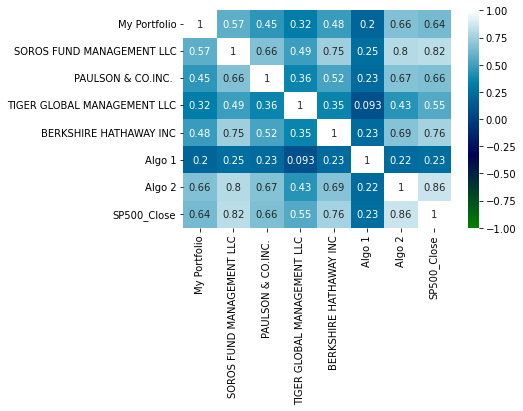

In [39]:
# Calculate and plot the correlation
all_portfolios_correlation = all_portfolios_combined.corr()
sns.heatmap(all_portfolios_correlation, annot= True, vmin=-1, vmax=1, cmap='ocean')

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

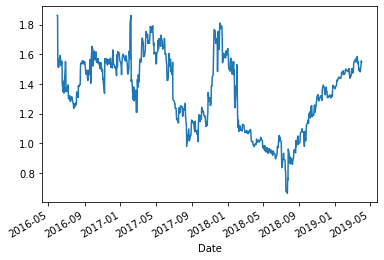

In [40]:
# Calculate and plot Beta
covariance_my_portfolio = all_portfolios_combined['My Portfolio'].rolling(window = 60).cov(all_portfolios_combined['SP500_Close'])
# Computing beta
my_portfolio_beta = covariance_my_portfolio / sp500_var
# Plot beta trend
my_portfolio_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [41]:
# Calculate Annualized Sharpe Ratios
all_portfolios_sharpe = (all_portfolios_combined.mean() * 252) / (all_portfolios_combined.std() * np.sqrt(252))
all_portfolios_sharpe

My Portfolio                   0.877143
SOROS FUND MANAGEMENT LLC      0.508127
PAULSON & CO.INC.             -0.513993
TIGER GLOBAL MANAGEMENT LLC   -0.320993
BERKSHIRE HATHAWAY INC         1.021779
Algo 1                         1.262894
Algo 2                         0.973127
SP500_Close                    1.008805
dtype: float64

<AxesSubplot:>

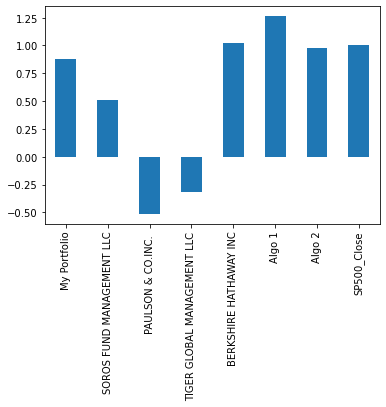

In [42]:
# Visualize the sharpe ratios as a bar plot
all_portfolios_sharpe.plot(kind = 'bar')

### How does your portfolio do?

My portfolio's Sharpe ratio is .87, which is not a good Sharpe ratio. It falls behind Berkshire Hathaway Inc., Algo 1, Algo 2, and the S&P 500.